In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.drop(['Description'], axis = 1)

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
any(df['Quantity'] < 0)

True

In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.shape

(397924, 7)

In [ ]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['InvoicDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,InvoicDate
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [ ]:

reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Total Price': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [ ]:
rfm.shape

(4339, 4)

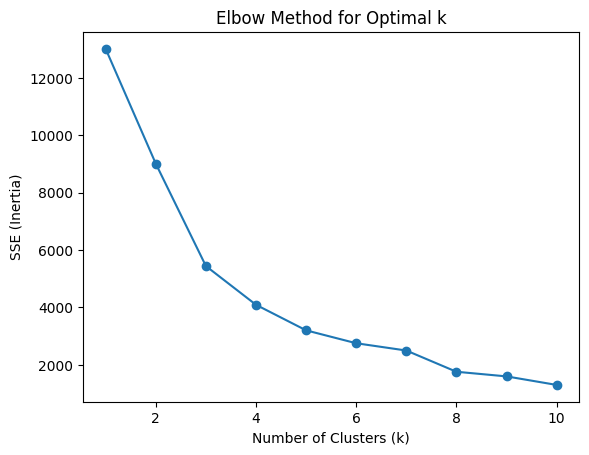

In [ ]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=23062005 )
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
cluster_counts = rfm['Cluster'].value_counts()
print(cluster_counts)

Cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64


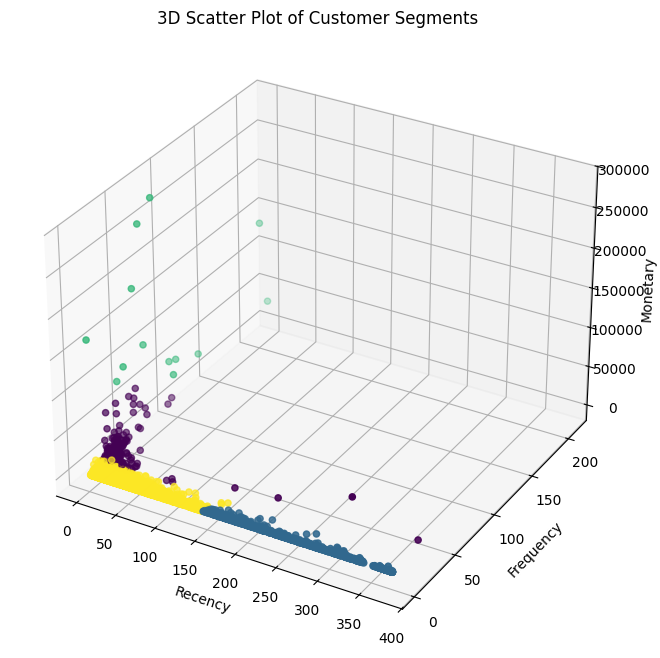

In [ ]:

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with different colors based on clusters
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Customer Segments')

plt.show()


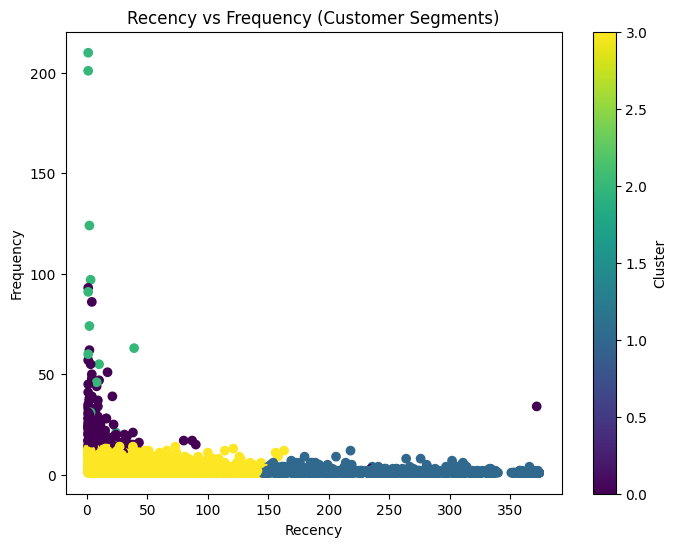

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency (Customer Segments)')
plt.colorbar(label='Cluster')
plt.show()


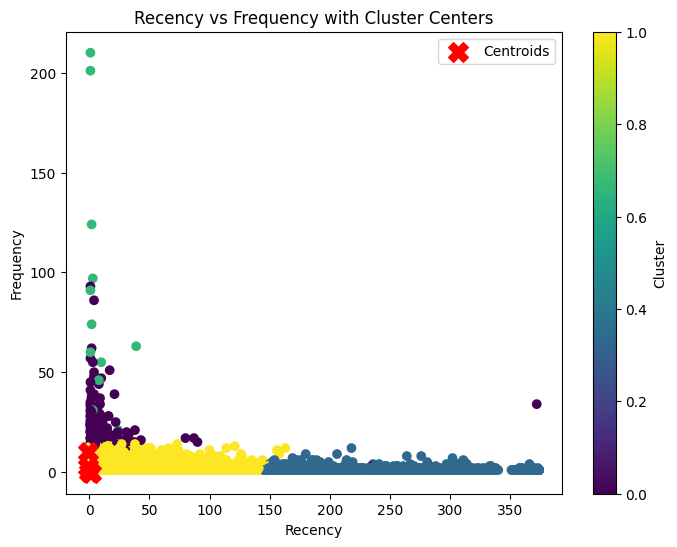

In [ ]:
# Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency with Cluster Centers')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


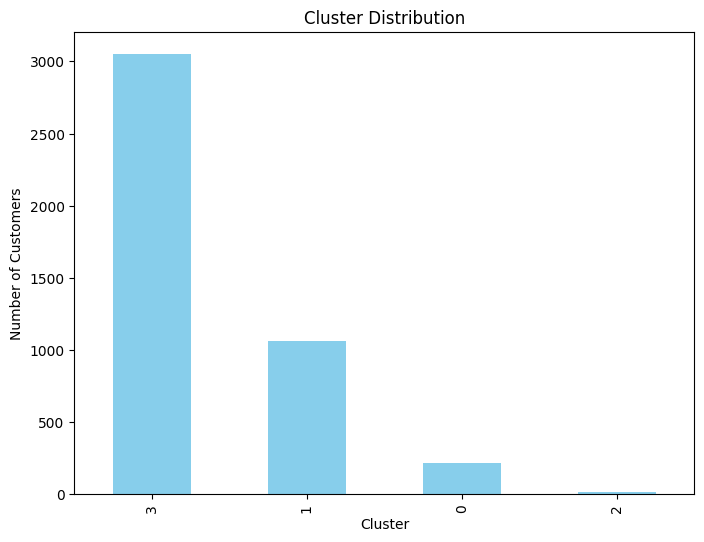

In [ ]:
cluster_counts = rfm['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')
plt.show()


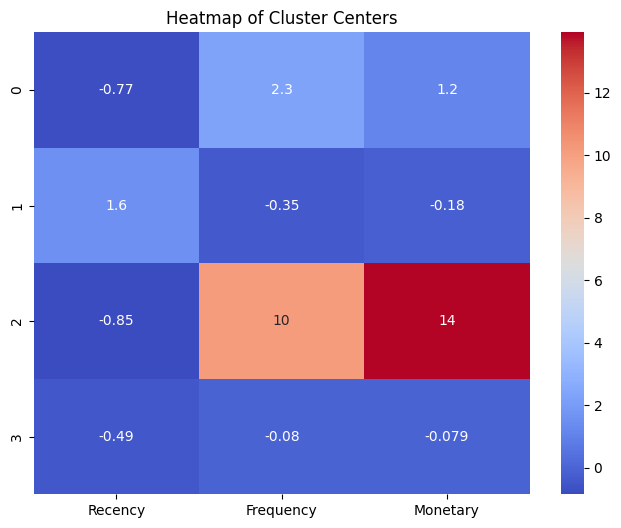

In [ ]:


# Create a DataFrame of cluster centers
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_centers_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Cluster Centers')
plt.show()


In [ ]:
# Create a DataFrame to view the cluster centers (average RFM values)
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
print(cluster_centers_df)


    Recency  Frequency   Monetary
0 -0.769159   2.301580   1.153697
1  1.561461  -0.353112  -0.175316
2 -0.851352  10.178375  13.940309
3 -0.485614  -0.080446  -0.078545


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)


cluster_centers_df_original = pd.DataFrame(cluster_centers_original, columns=['Recency', 'Frequency', 'Monetary'])
print(cluster_centers_df_original)


      Recency  Frequency       Monetary
0   15.603774  22.004717   12422.315802
1  248.661640   1.551367     478.194732
2    7.384615  82.692308  127338.313846
3   43.957746   3.652145    1347.891996


In [ ]:
cluster_labels = {
    0: 'Loyal High Spend Customers',
    1: 'Inactive or Low Spend Customers',
    2: 'VIP High Frequency & High Spend',
    3: 'Moderately Engaged Customers'
}

rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Cluster_Label
0,12346.0,326,1,77183.60,0,Loyal High Spend Customers
1,12347.0,2,7,4310.00,3,Moderately Engaged Customers
2,12348.0,75,4,1797.24,3,Moderately Engaged Customers
3,12349.0,19,1,1757.55,3,Moderately Engaged Customers
4,12350.0,310,1,334.40,1,Inactive or Low Spend Customers


In [ ]:

# Save the trained scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
# Save the trained KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
